## In this project, I analyze a dataset containing restaurant reviews and whether they are positive or negative. From this, I will conduct sentiment analysis to teach the program to predict whether a review is positive or negative. The program can often predict with 80% accuracy. 

In [4]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt   
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sentiment_analysis import sentiment_analysis

## The first thing we should analyze is the most common words used in these reviews. As we can see, the most common words in all reviews are 'good','place' and 'food'. In positive reviews, they are 'food', 'great', and 'good'. In negative reviews, they are 'back','place', and 'food'.

In [5]:
# Creating the data frame
reviews=pd.read_csv(os.path.join(os.getcwd(), "Restaurant_Reviews.csv"))
stop = set(stopwords.words('english'))

In [6]:
sa = sentiment_analysis()

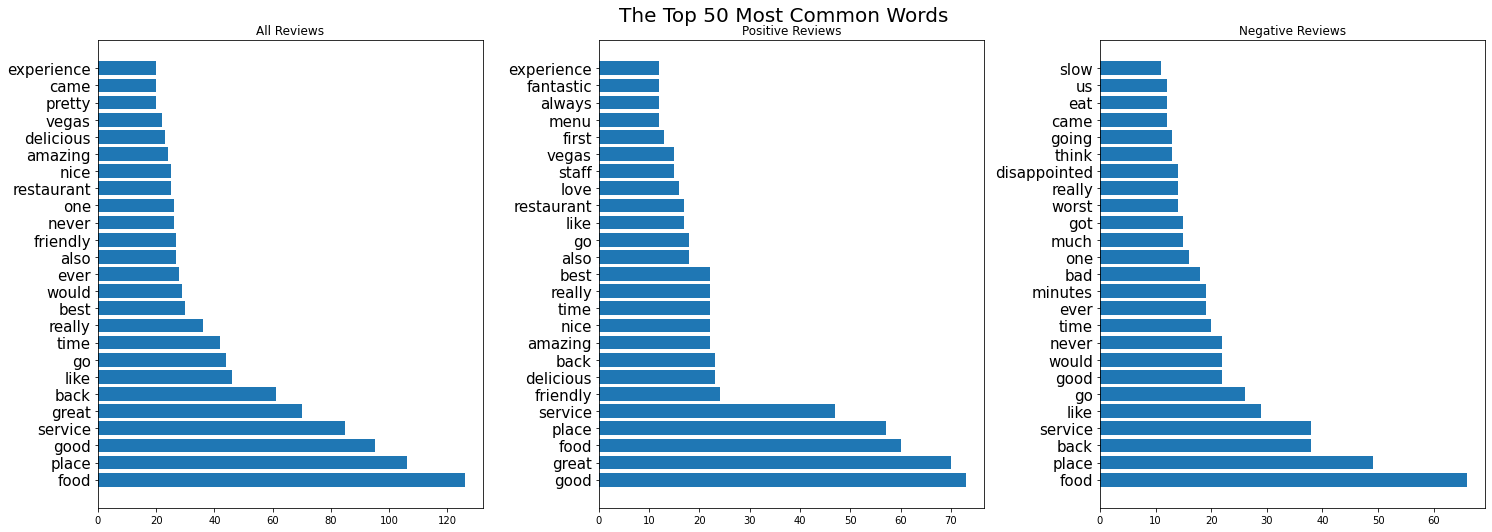

In [7]:
#Creating a figure with three subplots to display the most common words in 
#positive, negative, and all reviews.
fig, common_axs = plt.subplots(1, 3,figsize=(20,7.5)) 
fig.suptitle("The Top 50 Most Common Words", fontsize=20)
fig.tight_layout()
fig.subplots_adjust(wspace=.30)

sa.GraphCommonBar(reviews,"All", stop, common_axs, 0) 
sa.GraphCommonBar(reviews[reviews["Liked"]==1],"Positive", stop, common_axs,1)
sa.GraphCommonBar(reviews[reviews["Liked"]==0],"Negative", stop, common_axs,2)


plt.show()


### The next step is to clean the data by removing punctuation from the reviews. 

In [8]:
def remove_punctuation(text): ##Replaces punctuation with an empty string.
    final = "".join(
      char for char in text if char not in ("?", ".", ";", ":",  "!",'"'))
    return final

reviews["Review"]=reviews["Review"].apply(remove_punctuation)
reviews = reviews.dropna(subset=['Review'])

reviews

,Review,Liked
0,Wow Loved this place,1
1,Crust is not good,0
2,Not tasty and the texture was just nasty,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone,0
997,Overall I was not impressed and would not go back,0
998,"The whole experience was underwhelming, and I ...",0


## A note on the next cell. 
In the next cell, we will produce a 2D array. Every row (review) in the data frame above is recorded as a separate list in the array. Each list contains a series of numbers, one for each unique word found in the entire data frame. For each row (review), a 1 indicates that the word exists, and a 0 indicates that the word does not exist. 

For instance, consider the following line: "hi my name is michael" The entries for 'hi' 'my', 'name', 'is', and 'michael' would all be 1's in the first list as each of them appear once. The entries for every other unique word in the data frame wiill be 0. 

In [9]:
X_train,X_test,y_train,y_test = train_test_split(reviews["Review"],
                                                 reviews["Liked"],
                                                 test_size=.2) 

#Creating a vectorizer object which will count the frequency of each word.
vectorizer = CountVectorizer(token_pattern=r'\w+') 
train_matrix=vectorizer.fit_transform(X_train)
test_matrix=vectorizer.transform(X_test)

#The next three print statements are meant to help explain the note above.
print ("These are the last 10 words in the vectorizer:")
print(vectorizer.get_feature_names_out()[-10:])

These are the last 10 words in the vectorizer:
['yelpers' 'yet' 'you' 'your' 'yourself' 'yucky' 'yukon' 'yum' 'yummy'
 'zero']


# Now that the data is cleaned and formatted, teach the program to make predictions based on the reviews from the testing dataset.

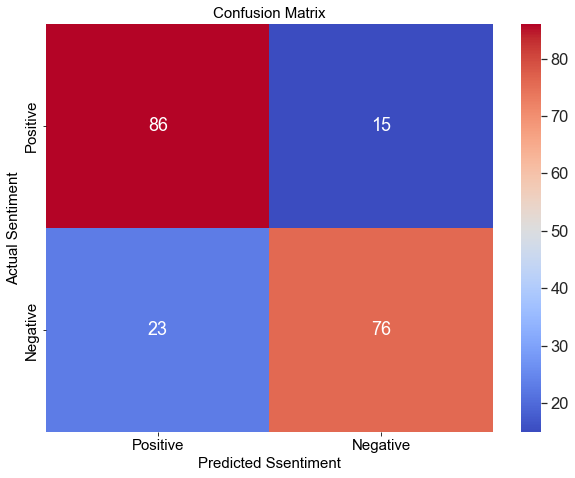

In [10]:
sa.makePredictions(train_matrix, y_train, test_matrix, y_test)

## The program has made its predictions, so we can examine how well it did below. 

In [11]:
print(sa.confusion_matrix_metrics)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       101
           1       0.84      0.77      0.80        99

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200

